# Case Study



# Problem 1 

In this problem, you are going to build predictive models on the estimation of energy performance of residential buildings.

## Dataset

You are given `ENB2012_data.xlsx` file. You can also get the dataset from the following link: http://archive.ics.uci.edu/ml/datasets/energy+efficiency. The dataset comprises 768 samples and 8 features. The features are:

1. Relative compactness
2. Surface area
3. Wall area
4. Roof area
5. Overall height
6. Orientation
7. Glazing area
8. Glazing area distribution

The two output variables are heating load (HL) and cooling load (CL) of residential buildings. Machine learning models can be used to predict heating and cooling loads for the aforementioned features of a building.

## Scientific Article

There is a scientific article which provides some analysis on this data set: A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012.


In [59]:
import pandas as pd

def load_excel_data(filename):
    data = pd.read_excel(filename)
    return data


In [60]:
data = load_excel_data('ENB2012_data.xlsx')
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28



In this problem, you are asked to build a predictive model using Ridge Regression. Please perform the following tasks:

## Task 1

1. Build a predictive model using Ridge Regression.
2. Test the ridge model with the following alpha parameters: 0.001, 0.01, 0.1, 1.0, and 10.0.
3. Find the optimal alpha parameter that gives the best results.
4. Using the optimal alpha parameter, calculate the Mean Absolute Error (MAE) and Mean Squared Error (MSE) using 10-fold cross-validation with 10 repetitions and randomly chosen data.
5. Calculate the mean score and standard deviation for these cross-validations.

After completing these tasks, you should have a predictive model that accurately estimates the energy performance of residential buildings.


In [61]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, RepeatedKFold



In [62]:
def ridge_regression_with_grid_search(data, alphas, n_folds, n_repeats):

    # Split the dataset into features (X) and target variables (y)
    X = data.iloc[:, :-2].values
    y = data.iloc[:, -2:].values

    # Define the Ridge Regression model
    ridge = Ridge()

    # Define the grid search parameters
    param_grid = {'alpha': alphas}

    # Define the cross-validation parameters
    kf = RepeatedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

    # Perform grid search cross-validation to find the optimal alpha parameter
    grid_search = GridSearchCV(ridge, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)
    grid_search.fit(X, y)

    # Print the optimal alpha parameter
    print("Optimal alpha parameter: ", grid_search.best_params_)

    return grid_search


In [63]:
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
n_folds = 10
n_repeats = 10

result = ridge_regression_with_grid_search(data, alphas, n_folds, n_repeats)


Optimal alpha parameter:  {'alpha': 0.001}


In [64]:
def ridge_regression_with_cv(data, alpha=0.001, n_folds=10, n_repeats=10, random_state=42):
    
    # Split the dataset into features (X) and target variables (Y1, Y2)
    X = data.iloc[:, :-2].values
    Y1 = data.iloc[:, -2].values
    Y2 = data.iloc[:, -1].values
    
    # Set up the ridge regression model with alpha
    ridge = Ridge(alpha=alpha)

    # Set up cross-validation parameters
    kf = cv = RepeatedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=random_state)

    # Calculate Mean Absolute Error and Mean Squared Errors scores for Y1
    mae_scores_y1 = cross_val_score(ridge, X, Y1, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1, 
                                    error_score='raise')
    mse_scores_y1 = cross_val_score(ridge, X, Y1, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1, 
                                    error_score='raise')

    # Calculate Mean Absolute Error and Mean Squared Errors scores for Y2
    mae_scores_y2 = cross_val_score(ridge, X, Y2, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1, 
                                    error_score='raise')
    mse_scores_y2 = cross_val_score(ridge, X, Y2, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1, 
                                    error_score='raise')

    # Calculate mean and standard deviation of the scores for Y1
    mae_mean_y1 = np.mean(-mae_scores_y1)
    mae_std_y1 = np.std(-mae_scores_y1)
    mse_mean_y1 = np.mean(-mse_scores_y1)
    mse_std_y1 = np.std(-mse_scores_y1)

    # Calculate mean and standard deviation of the scores for Y2
    mae_mean_y2 = np.mean(-mae_scores_y2)
    mae_std_y2 = np.std(-mae_scores_y2)
    mse_mean_y2 = np.mean(-mse_scores_y2)
    mse_std_y2 = np.std(-mse_scores_y2)

    # Print the results as a table
    print("Ridge Regression Results")
    print("Y1 Output")
    print("MAE: {:.3f} +/- {:.3f}".format(mae_mean_y1, mae_std_y1))
    print("MSE: {:.3f} +/- {:.3f}".format(mse_mean_y1, mse_std_y1))
    print()
    print("Y2 Output")
    print("MAE: {:.3f} +/- {:.3f}".format(mae_mean_y2, mae_std_y2))
    print("MSE: {:.3f} +/- {:.3f}".format(mse_mean_y2, mse_std_y2))
    
    return mae_mean_y1,mae_std_y1,mse_mean_y1,mse_std_y1,mae_mean_y2,mae_std_y2,mse_mean_y2,mse_std_y2


In [65]:
mae_mean_y1,mae_std_y1,mse_mean_y1,mse_std_y1,mae_mean_y2,mae_std_y2,mse_mean_y2,mse_std_y2=ridge_regression_with_cv(data, alpha=0.001, n_folds=10, n_repeats=10, random_state=42)


Ridge Regression Results
Y1 Output
MAE: 2.087 +/- 0.242
MSE: 8.685 +/- 1.766

Y2 Output
MAE: 2.266 +/- 0.272
MSE: 10.344 +/- 2.720




## Task 2

1. Using GridSearch, find the optimal values for the following parameters for RandomForestRegressor:

    ```
    parameters = {
        "clf_n_estimators":(10,50,100,250,500),
        "clf_max_depth":(50,150,250),
        "clf_min_samples_split":(2,3),
        "clf_min_samples_leaf":(1,2,3),
    }
    ```

2. Report the optimal values you found.

3. Using the optimal parameters, calculate the Mean Absolute Error (MAE) and Mean Squared Error (MSE) scores for 10-fold cross-validation with 10 repetitions and randomly chosen data.

4. Calculate the mean and standard deviation of the scores for cross-validations.

5. Repeat steps 1-4 separately for Y1 and Y2 outputs.

After completing these tasks, you should have two separate predictive models for heating load (Y1) and cooling load (Y2) of residential buildings, which accurately estimate their energy performance.


In [66]:
parameters = {
    "clf_n_estimators":(10,50,100,250,500),
    "clf_max_depth":(50,150,250),
    "clf_min_samples_split":(2,3),
    "clf_min_samples_leaf":(1,2,3),
}

In [67]:
def random_forest_grid_search(data):
    
    # Split the dataset into features (X) and target variables (y)
    X = data.iloc[:, :-2].values
    y = data.iloc[:, -2:].values
    
    # Define the parameter grid
    param_grid = {
        "n_estimators": [10, 50, 100, 250, 500],
        "max_depth": [50, 150, 250],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [1, 2, 3]
    }

    # Create a RandomForestRegressor object
    rf = RandomForestRegressor(random_state=42)

    # Create a GridSearchCV object
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=10,
        n_jobs=-1
    )

    # Fit the grid search to the data
    grid_search.fit(X, y)

    # Return the optimal parameters
    return grid_search.best_params_


In [68]:
optimal_params = random_forest_grid_search(data)
print("Optimal parameters:", optimal_params)


Optimal parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [69]:
def run_rf_regressor(data, opt_params, num_repeats=10, num_folds=10, random_state=42):

    # Split the dataset into features (X) and target variables (Y1, Y2)
    X = data.iloc[:, :-2].values
    y1 = data.iloc[:, -2].values
    y2 = data.iloc[:, -1].values
    

    # Define the cross validation strategy
    cv_strategy = RepeatedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=random_state)

    # Define the regressor with optimal parameters
    rf_regressor_y1 = RandomForestRegressor(**opt_params, random_state=random_state)
    rf_regressor_y2 = RandomForestRegressor(**opt_params, random_state=random_state)

    # Calculate the cross validation scores using mean absolute error and mean squared error for Y1 output
    y1_mae_scores = cross_val_score(rf_regressor_y1, X, y1, cv=cv_strategy, scoring='neg_mean_absolute_error', n_jobs=-1)
    y1_mse_scores = cross_val_score(rf_regressor_y1, X, y1, cv=cv_strategy, scoring='neg_mean_squared_error', n_jobs=-1)

    # Calculate the cross validation scores using mean absolute error and mean squared error for Y2 output
    y2_mae_scores = cross_val_score(rf_regressor_y2, X, y2, cv=cv_strategy, scoring='neg_mean_absolute_error', n_jobs=-1)
    y2_mse_scores = cross_val_score(rf_regressor_y2, X, y2, cv=cv_strategy, scoring='neg_mean_squared_error', n_jobs=-1)

    # Convert the negative scores to positive
    y1_mae_scores = -y1_mae_scores
    y1_mse_scores = -y1_mse_scores
    y2_mae_scores = -y2_mae_scores
    y2_mse_scores = -y2_mse_scores

    # Calculate the mean and standard deviation of the cross validation scores for Y1 output
    y1_mae_mean = y1_mae_scores.mean()
    y1_mae_std = y1_mae_scores.std()
    y1_mse_mean = y1_mse_scores.mean()
    y1_mse_std = y1_mse_scores.std()

    # Calculate the mean and standard deviation of the cross validation scores for Y2 output
    y2_mae_mean = y2_mae_scores.mean()
    y2_mae_std = y2_mae_scores.std()
    y2_mse_mean = y2_mse_scores.mean()
    y2_mse_std = y2_mse_scores.std()

    # Print the results in a table
    print("Results for Y1 output:")
    print("MAE: {:.2f} +/- {:.2f}".format(y1_mae_mean, y1_mae_std))
    print("RMSE: {:.2f} +/- {:.2f}".format(y1_mse_mean, y1_mse_std))

    print("\nResults for Y2 output:")
    print("MAE: {:.2f} +/- {:.2f}".format(y2_mae_mean, y2_mae_std))
    print("RMSE: {:.2f} +/- {:.2f}".format(y2_mse_mean, y2_mse_std))
    
    return y1_mae_mean,y1_mae_std,y1_mse_mean,y1_mse_std,y2_mae_mean,y2_mae_std,y2_mse_mean,y2_mse_std


In [70]:
y1_mae_mean,y1_mae_std,y1_mse_mean,y1_mse_std,y2_mae_mean,y2_mae_std,y2_mse_mean,y2_mse_std= run_rf_regressor(data, optimal_params, num_repeats=10, num_folds=10)

Results for Y1 output:
MAE: 0.31 +/- 0.04
RMSE: 0.22 +/- 0.06

Results for Y2 output:
MAE: 0.98 +/- 0.14
RMSE: 2.63 +/- 0.68


In your report, provide a table like given below for the scores. The values in the tables are mean and
standart deviations. 

In [71]:
def print_regression_results(y1_mae_mean, y1_mae_std, y1_mse_mean, y1_mse_std, mae_mean_y1, mae_std_y1, mse_mean_y1, mse_std_y1, y2_mae_mean, y2_mae_std, y2_mse_mean, y2_mse_std, mae_mean_y2, mae_std_y2, mse_mean_y2, mse_std_y2):
    
    # Results for Y1
    y1_rf_mae = y1_mae_mean
    y1_rf_mae_std = y1_mae_std
    y1_rf_mse = y1_mse_mean
    y1_rf_mse_std = y1_mse_std
    y1_ridge_mae = mae_mean_y1
    y1_ridge_mae_std = mae_std_y1
    y1_ridge_mse = mse_mean_y1
    y1_ridge_mse_std = mse_std_y1

    # Results for Y2
    y2_rf_mae = y2_mae_mean
    y2_rf_mae_std = y2_mae_std
    y2_rf_mse = y2_mse_mean
    y2_rf_mse_std = y2_mse_std
    y2_ridge_mae = mae_mean_y2
    y2_ridge_mae_std = mae_std_y2
    y2_ridge_mse = mse_mean_y2
    y2_ridge_mse_std = mse_std_y2

    # Create the table
    print("{:^10} {:^20} {:^20} {:^25} {:^25}".format("", "Mean Absolute Error", "Root Mean Squared Error", "", ""))
    print("{:^10} {:^20} {:^20} {:^25} {:^25}".format("Output", "RandomForest", "RidgeRegression", "RandomForest", "RidgeRegression"))
    print("{:^10} {:^20} {:^20} {:^25} {:^25}".format("Y1", "{:.2f} ± {:.2f}".format(y1_rf_mae, y1_rf_mae_std), "{:.2f} ± {:.2f}".format(y1_ridge_mae, y1_ridge_mae_std), "{:.2f} ± {:.2f}".format(y1_rf_mse, y1_rf_mse_std), "{:.2f} ± {:.2f}".format(y1_ridge_mse, y1_ridge_mse_std)))
    print("{:^10} {:^20} {:^20} {:^25} {:^25}".format("Y2", "{:.2f} ± {:.2f}".format(y2_rf_mae, y2_rf_mae_std), "{:.2f} ± {:.2f}".format(y2_ridge_mae, y2_ridge_mae_std), "{:.2f} ± {:.2f}".format(y2_rf_mse, y2_rf_mse_std), "{:.2f} ± {:.2f}".format(y2_ridge_mse, y2_ridge_mse_std)))


In [72]:
print_regression_results(y1_mae_mean,y1_mae_std,y1_mse_mean, y1_mse_std, 
              mae_mean_y1, mae_std_y1, mse_mean_y1, mse_std_y1,
              y2_mae_mean, y2_mae_std, y2_mse_mean, y2_mse_std,
              mae_mean_y2, mae_std_y2, mse_mean_y2, mse_std_y2)


           Mean Absolute Error  Root Mean Squared Error                                                    
  Output       RandomForest       RidgeRegression          RandomForest             RidgeRegression     
    Y1         0.31 ± 0.04          2.09 ± 0.24             0.22 ± 0.06               8.68 ± 1.77       
    Y2         0.98 ± 0.14          2.27 ± 0.27             2.63 ± 0.68              10.34 ± 2.72       





# Problem 2 

In this problem, you are going to build predictive models for bank telemarketing problem. The data is
related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns
were based on phone calls. Often, more than one contact to the same client was required, in order to
access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Dataset

 You are given bankadditional-full.csv file containing the data set. The dataset can also be obtained from https://archive.ics.uci.edu/ml/datasets/bank+marketing The features are:

1. age (numeric)
2. job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3. marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
The output variable is:

21. y: has the client subscribed a term deposit? (binary: 'yes', 'no')


## Scientific Article

The
following article describes some analysis on this dataset: S. Moro, P. Cortez and P. Rita. A DataDriven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier,
62:22-31, June 2014.

You are going to build predictive models for the prediction of the ouput whether a given client will
subscrive a term deposit or not. You will use data in “bank-additional-full.csv” file. Some attributes
have “unknown” or “nonexistent” categories. Don’t bother to clean this data. You can consider them
as a category in that attribute. Note that you may not get the exact results with results given in the
assignment. Slightly different results are fine.


In [73]:
def load_csv_data(filename):
    df = pd.read_csv(filename, sep=';')
    return df

In [74]:
df = load_csv_data('bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no




## Task 1

Build a logistic regression model following the instructions given below:

1. Use AUC metric for scoring the model.
2. Use 5-fold cross-validation with 5 repetitions for cross-validation.
3. Select data randomly in cross-validation.
4. Find the C parameter which gives the highest AUC score.
5. Note that C is a hyperparameter in Logistic Regression which means Inverse of regularization strength.
6. Try the model with 20 different C parameters.
7. C parameters should range from 10^-4 to 10^4.
8. Plot mean AUC score vs C parameter.

Please note that the calculation takes some time since you will train and test the model for 500 times. Your figure should look like the one given below.



In [103]:
#Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [84]:
def find_best_C(data, C_range, num_repeats, num_folds,random_state=1):
    # Define the input and target variables
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # Convert categorical variables to dummy variables
    X = pd.get_dummies(X)

    # Set up the RepeatedKFold cross-validator
    rkf = RepeatedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=random_state)

    # Set up an empty list to store the mean AUC scores for each value of C
    mean_auc_scores = []

    # Loop over each value of C
    for C in C_range:
        # Set up the logistic regression model
        lr = LogisticRegression(C=C, penalty='l2', solver='liblinear', random_state=random_state)

        # Set up an empty list to store the AUC scores for each fold
        auc_scores = []

        # Loop over each fold of the cross-validator
        for train_idx, test_idx in rkf.split(X):
            X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
            X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

            # Scale the input variables
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Fit the logistic regression model to the training data
            lr.fit(X_train_scaled, y_train)

            # Predict the probability of the target variable for the test data
            y_prob = lr.predict_proba(X_test_scaled)[:, 1]

            # Calculate the AUC score for the test data
            auc = roc_auc_score(y_test, y_prob)

            # Append the AUC score to the list of AUC scores for this value of C
            auc_scores.append(auc)

        # Calculate the mean AUC score for this value of C
        mean_auc = np.mean(auc_scores)

        # Append the mean AUC score to the list of mean AUC scores for each value of C
        mean_auc_scores.append(mean_auc)

    # Find the index of the maximum mean AUC score
    max_auc_idx = np.argmax(mean_auc_scores)

    # Find the value of C that gives the maximum mean AUC score
    best_C = C_range[max_auc_idx]

    # Plot mean AUC score vs C
    plt.plot(C_range, mean_auc_scores)
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Mean AUC Score')
    plt.title('Logistic Regression')
    plt.show()

    return best_C, round(mean_auc_scores[max_auc_idx], 4)


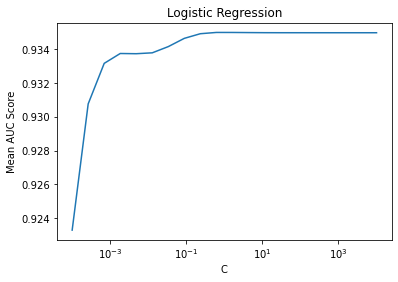

The best C value is 0.615848211066026 with a mean AUC score of 0.935


In [85]:
C_range = np.logspace(-4, 4, 20)
num_repeats = 5
num_folds = 5
best_C, mean_auc_score = find_best_C(df, C_range, num_repeats, num_folds)
print("The best C value is", best_C, "with a mean AUC score of", (mean_auc_score))


## Task 2 : Build a Random Forest model.

Follow the instructions given when building the model. Using gridsearch try to find the best score and combination of the following hyperparameters:

- Number of estimators: 10, 50, 100, 250, 500, 1000
- Max depth: 50, 150, 250
- Min samples split: 2, 3
- Min samples leaf: 1, 2, 3

For cross-validation in grid search use a cross validation strategy as 3-fold cross-validation with 3 repetitions.

Report the hyperparameter set yielding the best score. For scoring use AUC score.


In [90]:
def grid_search_random_forest(df,param_grid,n_splits=3, n_repeats=3,random_state=1):

    # One-hot encode categorical variables
    df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

    # Split into features and target
    X = df.drop('y', axis=1)
    y = df['y']

    # create random forest classifier
    rfc = RandomForestClassifier()


    # set up cross-validation strategy for grid search
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

    # perform grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=rfc,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=cv,
        n_jobs=-1
    )

    # fit grid search to data
    grid_search.fit(X, y)

    # get best hyperparameters and corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # return best hyperparameters and corresponding score
    return best_params, best_score


In [91]:
# set up parameter grid for grid search
param_grid = {
        'n_estimators': [10, 50, 100, 250, 500, 1000],
        'max_depth': [50, 150, 250],
        'min_samples_split': [2, 3],
        'min_samples_leaf': [1, 2, 3]
    }

best_params, best_score = grid_search_random_forest(df,param_grid)
print('Best hyperparameters:', best_params)
print('Best score:', best_score)


Best hyperparameters: {'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1000}
Best score: 0.9446425353004856


## Task 3 : Build a neural network model:
Follow the instructions given when building the model.
First, scale your input data so that it has zero mean and one standart deviation. This is important because neural network models are sensitive to input scaling.
Then using gridsearch try to find the best score and combination of the following hyperparameters:

- Hidden_layer_sizes: (10,10,10), (10,10,10,10), (10,10,10,10,10), (10,10,10,10,10,10)
- Alpha: 0.00001, 0.0001, 0.001, 0.01, 0.1

In grid search, use AUC score as scoring. For cross-validation in grid search, use a cross-validation strategy as 3-fold cross-validation with 3 repetitions.

Report the hyperparameter set yielding the best score.


In [96]:
def run_neural_network_model(df,param_grid,n_splits=3, n_repeats=3,random_state=1):

    # Preprocess data
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1].map({'no': 0, 'yes': 1})
    X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to numerical
    scaler = StandardScaler()
    X = scaler.fit_transform(X)  # Scale input data

    # Define neural network model
    mlp = MLPClassifier(random_state=1)

    # set up cross-validation strategy for grid search
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

    # Define grid search with AUC as scoring metric and 3-fold cross-validation
    grid_search = GridSearchCV(mlp, param_grid=param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)

    # Fit grid search to data
    grid_search.fit(X, y)

    # Print best hyperparameters and corresponding AUC score
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Best AUC score: ", grid_search.best_score_)


In [97]:
# Define hyperparameter search space
param_grid = {'hidden_layer_sizes': [(10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10)],
                  'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]}

run_neural_network_model(df,n_splits=3, n_repeats=3,param_grid=param_grid)


Best hyperparameters:  {'alpha': 0.1, 'hidden_layer_sizes': (10, 10, 10)}
Best AUC score:  0.939528587311741



## Task 4 : Prepare a classification report for three models
In this task, we will perform 5-fold cross-validation with randomly splitting data. For each model, we will print the average classification report for this 5-fold cross-validation.
We will use the following models:

- Logistic Regression with C=1
- Random Forest with optimal hyperparameters found in Task2
- Neural Network with optimal hyperparameters found in Task3



In [106]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

# Split into features and target
X = df.drop('y', axis=1)
y = df['y']

scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scale input data

logreg = LogisticRegression(C=1, solver='lbfgs', max_iter=1000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logreg_scores = cross_val_score(logreg, X, y, cv=cv, scoring='roc_auc')
logreg_mean_score = logreg_scores.mean()
logreg_std_score = logreg_scores.std()
print(f'Logistic Regression:\nAUC: {logreg_mean_score:.3f} +/- {logreg_std_score:.3f}\n')
logreg.fit(X, y)
y_pred_logreg = logreg.predict(X)
print('Classification Report for Logistic Regression:')
print(classification_report(y, y_pred_logreg))


rf = RandomForestClassifier(n_estimators=1000, max_depth=150, min_samples_split=3, min_samples_leaf=3, random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
rf_mean_score = rf_scores.mean()
rf_std_score = rf_scores.std()
print(f'Random Forest:\nAUC: {rf_mean_score:.3f} +/- {rf_std_score:.3f}\n')
rf.fit(X, y)
y_pred_rf = rf.predict(X)
print('Classification Report for Random Forest:')
print(classification_report(y, y_pred_rf))


nn = MLPClassifier(hidden_layer_sizes=(10, 10, 10), alpha=0.1, max_iter=200, random_state=42)
nn_scores = cross_val_score(nn, X, y, cv=cv, scoring='roc_auc')
nn_mean_score = nn_scores.mean()
nn_std_score = nn_scores.std()
print(f'Neural Network:\nAUC: {nn_mean_score:.3f} +/- {nn_std_score:.3f}\n')
nn.fit(X, y)
y_pred_nn = nn.predict(X)
print('Classification Report for Neural Network:')
print(classification_report(y, y_pred_nn))


Logistic Regression:
AUC: 0.935 +/- 0.003

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     36548
         yes       0.67      0.42      0.52      4640

    accuracy                           0.91     41188
   macro avg       0.80      0.70      0.74     41188
weighted avg       0.90      0.91      0.90     41188

Random Forest:
AUC: 0.945 +/- 0.002

Classification Report for Random Forest:
              precision    recall  f1-score   support

          no       0.96      0.99      0.98     36548
         yes       0.93      0.70      0.80      4640

    accuracy                           0.96     41188
   macro avg       0.94      0.85      0.89     41188
weighted avg       0.96      0.96      0.96     41188

Neural Network:
AUC: 0.941 +/- 0.003

Classification Report for Neural Network:
              precision    recall  f1-score   support

          no       0.95      0.96      0.96